# MultiClass Classification - Recap 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

## Data Preprocessing

In [3]:
df = pd.read_csv("covtype2.csv")


In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,2596,51,3,510,221,232,6279,1,0,0,...,0,0,0,0,0,0,5,66564,384,1298
1,2590,56,2,390,220,235,6225,1,0,0,...,0,0,0,0,0,0,5,44980,301,1292
2,2804,139,9,3180,234,238,6121,1,0,0,...,0,0,0,0,0,0,2,76049,1724,1434
3,2785,155,18,3090,238,238,6211,1,0,0,...,0,0,0,0,0,0,2,72488,1666,1451
4,2595,45,2,391,220,234,6172,1,0,0,...,0,0,0,0,0,0,5,23410,272,1297


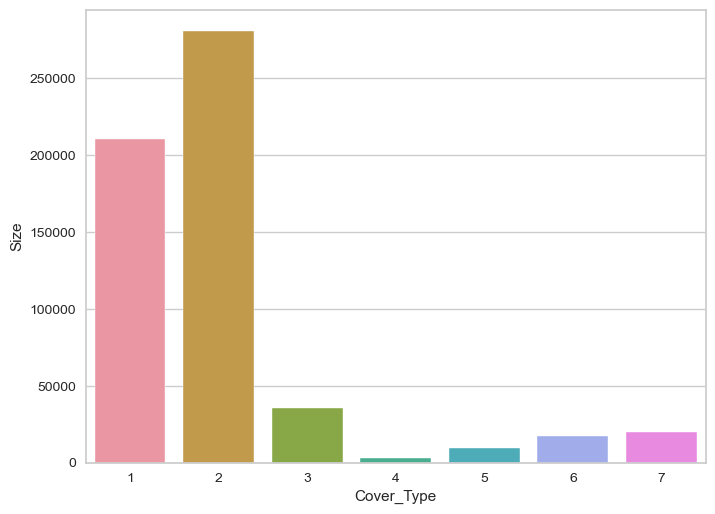

In [5]:
class_tree = df.groupby('Cover_Type').size()
class_label = pd.DataFrame(class_tree,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size', data = class_label)

In [6]:
len(df[df["Cover_Type"]== 4 ])

2741

In [7]:
df[df["Cover_Type"] == 1] = df[df["Cover_Type"] == 1].sample(1500)

In [8]:
df[df["Cover_Type"] == 1]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
108,2863.0,348.0,14.0,3918.0,193.0,216.0,5695.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,103402.0,2113.0,1476.0
529,2915.0,45.0,10.0,4397.0,223.0,218.0,3018.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3600.0,2228.0,1457.0
586,3024.0,24.0,16.0,4116.0,210.0,204.0,4161.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,88885.0,2206.0,1525.0
759,3146.0,85.0,9.0,3755.0,233.0,225.0,3099.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37953.0,1973.0,1589.0
996,3032.0,339.0,14.0,4710.0,189.0,219.0,518.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9554.0,2402.0,1527.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557379,2702.0,40.0,19.0,3061.0,218.0,195.0,2624.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,297305.0,1801.0,1317.0
557644,2697.0,354.0,22.0,2850.0,177.0,195.0,2469.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,130997.0,1605.0,1335.0
557868,2771.0,52.0,26.0,3181.0,223.0,176.0,2588.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,262210.0,1846.0,1369.0
558220,2765.0,4.0,20.0,2854.0,190.0,198.0,2337.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,65561.0,1555.0,1380.0


In [9]:
df[df["Cover_Type"] == 2] = df[df["Cover_Type"] == 2].sample(1500)
df[df["Cover_Type"] == 3] = df[df["Cover_Type"] == 3].sample(1500)
df[df["Cover_Type"] == 4] = df[df["Cover_Type"] == 4].sample(1500)
df[df["Cover_Type"] == 5] = df[df["Cover_Type"] == 5].sample(1500)
df[df["Cover_Type"] == 6] = df[df["Cover_Type"] == 6].sample(1500)
df[df["Cover_Type"] == 7] = df[df["Cover_Type"] == 7].sample(1500)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(10500, 46)

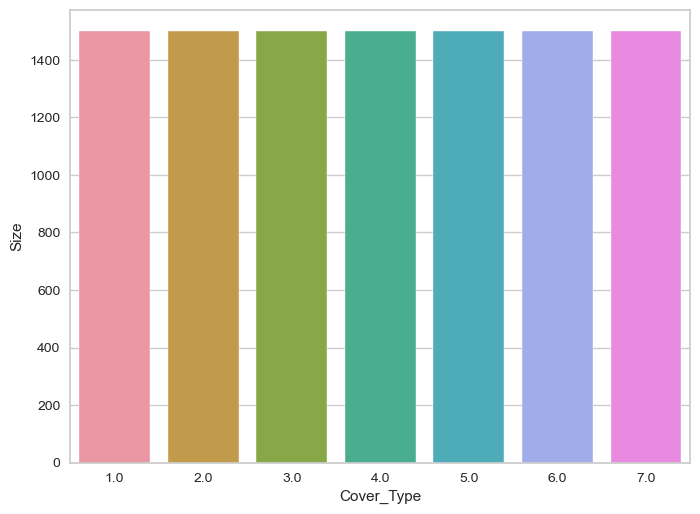

In [13]:
class_tree = df.groupby('Cover_Type').size()
class_label = pd.DataFrame(class_tree,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size', data = class_label)

In [14]:
X = df.drop("Cover_Type",axis=1)
y = df["Cover_Type"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 138453 to 364714
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           8400 non-null   float64
 1   Aspect                              8400 non-null   float64
 2   Slope                               8400 non-null   float64
 3   Horizontal_Distance_To_Roadways     8400 non-null   float64
 4   Hillshade_9am                       8400 non-null   float64
 5   Hillshade_Noon                      8400 non-null   float64
 6   Horizontal_Distance_To_Fire_Points  8400 non-null   float64
 7   Wilderness_Area1                    8400 non-null   float64
 8   Wilderness_Area2                    8400 non-null   float64
 9   Wilderness_Area3                    8400 non-null   float64
 10  Wilderness_Area4                    8400 non-null   float64
 11  Soil_Type1                          

In [18]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [19]:
df.shape

(10500, 46)

## XGBoost Classifier

In [20]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
y_pred = xgb_classifier.predict(X_test)

In [22]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_accuracy

0.8280952380952381

In [23]:
xgb_f1 = f1_score(y_test, y_pred, average='macro')
xgb_f1

0.8256164165397948

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.75      0.70      0.72       318
         2.0       0.72      0.62      0.67       301
         3.0       0.82      0.81      0.81       294
         4.0       0.91      0.96      0.93       301
         5.0       0.84      0.94      0.89       287
         6.0       0.82      0.81      0.82       297
         7.0       0.91      0.97      0.94       302

    accuracy                           0.83      2100
   macro avg       0.82      0.83      0.83      2100
weighted avg       0.82      0.83      0.82      2100



In [25]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[222,  59,   0,   0,  10,   1,  26],
       [ 62, 188,   6,   0,  31,  11,   3],
       [  0,   1, 237,  20,   4,  32,   0],
       [  0,   0,   7, 289,   0,   5,   0],
       [  3,   9,   3,   0, 270,   2,   0],
       [  0,   4,  36,  10,   7, 240,   0],
       [  8,   0,   0,   0,   1,   0, 293]])

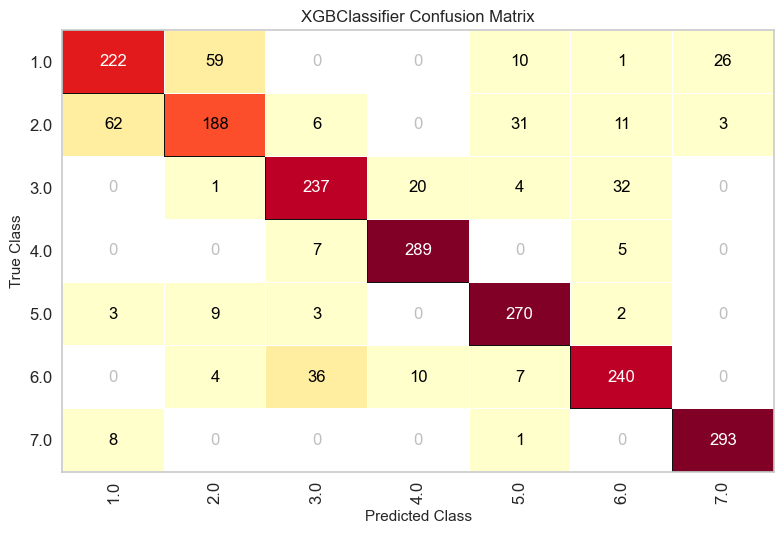

In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb_classifier)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

## Tuning XGBoost

In [27]:
xgb = XGBClassifier()

In [28]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [29]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 2, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  4.7min finished


In [30]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

In [31]:
xgb_tuned = XGBClassifier(learning_rate= 0.1, 
                                max_depth= 7, 
                                n_estimators= 300, 
                                subsample= 0.8).fit(X_train, y_train)

In [32]:
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[226,  53,   0,   0,  12,   2,  25],
       [ 54, 196,   8,   0,  26,  13,   4],
       [  0,   5, 242,  20,   2,  25,   0],
       [  0,   0,   8, 290,   0,   3,   0],
       [  1,   8,   2,   0, 273,   3,   0],
       [  0,   4,  26,  10,   5, 252,   0],
       [  6,   0,   0,   0,   1,   0, 295]])

In [33]:
xgb_f1_tuned = f1_score(y_test, y_pred, average='macro')
xgb_f1_tuned

0.8424952303377183

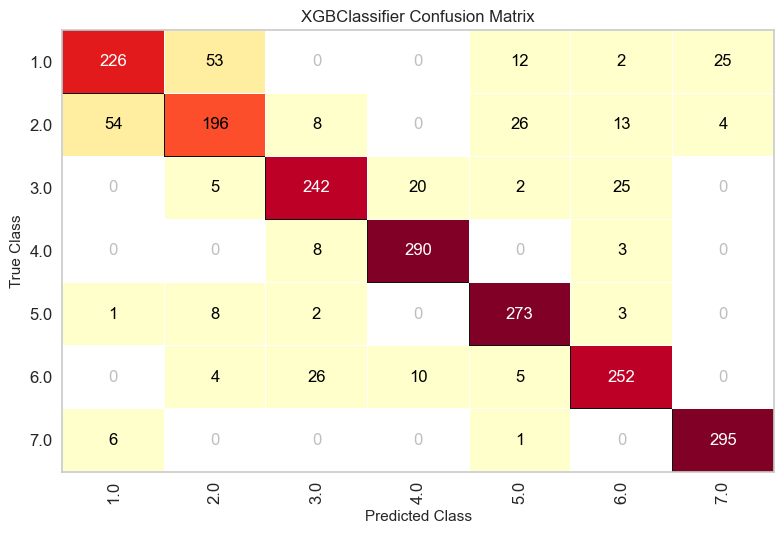

In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb_tuned)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.79      0.71      0.75       318
         2.0       0.74      0.65      0.69       301
         3.0       0.85      0.82      0.83       294
         4.0       0.91      0.96      0.93       301
         5.0       0.86      0.95      0.90       287
         6.0       0.85      0.85      0.85       297
         7.0       0.91      0.98      0.94       302

    accuracy                           0.84      2100
   macro avg       0.84      0.85      0.84      2100
weighted avg       0.84      0.84      0.84      2100



## XGBoost Scaled

In [36]:
xgb_tuned_scaled = XGBClassifier(learning_rate= 0.1, 
                                max_depth= 7, 
                                n_estimators= 300, 
                                subsample= 0.8).fit(X_train_scaled, y_train)

In [37]:
y_pred = xgb_tuned_scaled.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[230,  50,   0,   0,  10,   2,  26],
       [ 54, 196,   8,   0,  26,  13,   4],
       [  0,   4, 241,  20,   3,  26,   0],
       [  0,   0,   8, 290,   0,   3,   0],
       [  2,   9,   2,   0, 270,   4,   0],
       [  0,   3,  31,  10,   5, 248,   0],
       [  5,   0,   0,   0,   1,   0, 296]])

In [38]:
xgb_f1_tuned_scaled = f1_score(y_test, y_pred, average='macro')
xgb_f1_tuned_scaled

0.8410052292811665

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.79      0.72      0.76       318
         2.0       0.75      0.65      0.70       301
         3.0       0.83      0.82      0.83       294
         4.0       0.91      0.96      0.93       301
         5.0       0.86      0.94      0.90       287
         6.0       0.84      0.84      0.84       297
         7.0       0.91      0.98      0.94       302

    accuracy                           0.84      2100
   macro avg       0.84      0.84      0.84      2100
weighted avg       0.84      0.84      0.84      2100



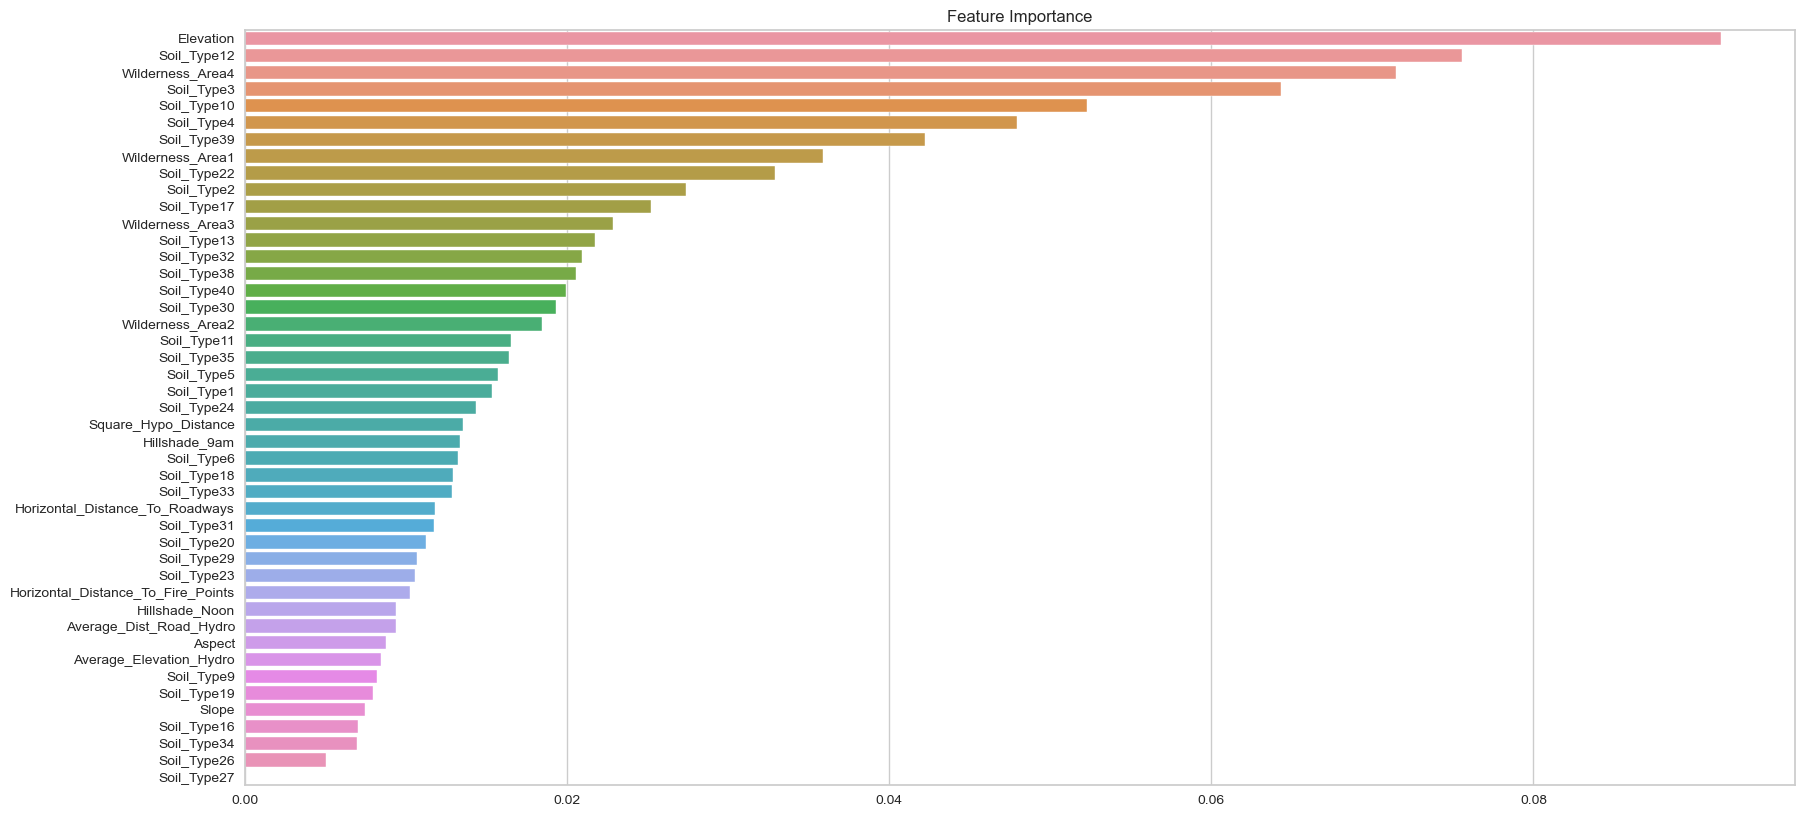

In [41]:
plt.figure(figsize=(20,10))
feature_imp = pd.Series(xgb_tuned_scaled.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

## Random Forest

In [42]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [43]:
y_pred_rf = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred_rf)

array([[242,  47,   0,   0,   7,   1,  21],
       [ 52, 193,   9,   0,  30,  13,   4],
       [  0,   1, 245,  18,   4,  26,   0],
       [  0,   0,   7, 293,   0,   1,   0],
       [  0,   8,   2,   0, 274,   3,   0],
       [  0,   3,  38,  14,   5, 237,   0],
       [  6,   0,   0,   0,   1,   0, 295]])

In [44]:
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_f1

0.8443931524885608

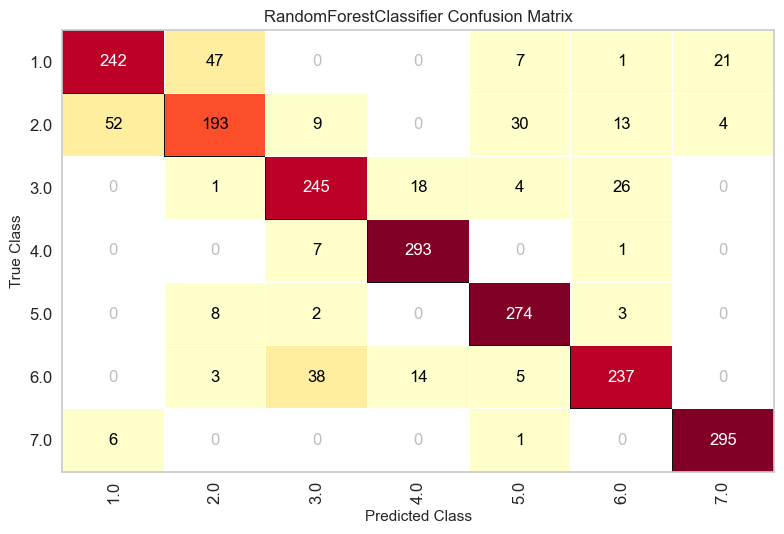

In [45]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rf_model)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

In [46]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.81      0.76      0.78       318
         2.0       0.77      0.64      0.70       301
         3.0       0.81      0.83      0.82       294
         4.0       0.90      0.97      0.94       301
         5.0       0.85      0.95      0.90       287
         6.0       0.84      0.80      0.82       297
         7.0       0.92      0.98      0.95       302

    accuracy                           0.85      2100
   macro avg       0.84      0.85      0.84      2100
weighted avg       0.84      0.85      0.84      2100



## Random Forest Tunning

In [47]:
rf = RandomForestClassifier()

In [48]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [49]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   57.6s finished


In [50]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 100}

In [59]:
rf_tuned = RandomForestClassifier(max_depth = 7,             
                                  max_features = 8, 
                                  min_samples_split = 2, 
                                  n_estimators = 100).fit(X_train, y_train)

In [60]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[211,  29,   0,   0,  25,   3,  50],
       [ 70, 135,   5,   0,  71,  14,   6],
       [  0,   0, 195,  35,  14,  50,   0],
       [  0,   0,  10, 286,   0,   5,   0],
       [  1,  17,   6,   0, 254,   9,   0],
       [  0,   0,  51,  23,  23, 200,   0],
       [ 12,   0,   0,   0,   1,   0, 289]])

In [61]:
rf_f1_tuned = f1_score(y_test, y_pred, average='macro')
rf_f1_tuned

0.7385293409024218

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.72      0.66      0.69       318
         2.0       0.75      0.45      0.56       301
         3.0       0.73      0.66      0.70       294
         4.0       0.83      0.95      0.89       301
         5.0       0.65      0.89      0.75       287
         6.0       0.71      0.67      0.69       297
         7.0       0.84      0.96      0.89       302

    accuracy                           0.75      2100
   macro avg       0.75      0.75      0.74      2100
weighted avg       0.75      0.75      0.74      2100



## Random Forest Scaled

In [63]:
rf_tuned_scaled = RandomForestClassifier(max_depth = 7,             
                                  max_features = 8, 
                                  min_samples_split = 2, 
                                  n_estimators = 100).fit(X_train_scaled, y_train)

In [64]:
y_pred = rf_tuned_scaled.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[210,  29,   0,   0,  26,   3,  50],
       [ 66, 140,   5,   0,  71,  14,   5],
       [  0,   0, 197,  33,  14,  50,   0],
       [  0,   0,  10, 287,   0,   4,   0],
       [  0,  21,   7,   0, 251,   8,   0],
       [  0,   0,  54,  23,  21, 199,   0],
       [ 12,   0,   0,   0,   1,   0, 289]])

In [65]:
rf_f1_tuned_scaled = f1_score(y_test, y_pred, average='macro')
rf_f1_tuned_scaled

0.7406530922906442

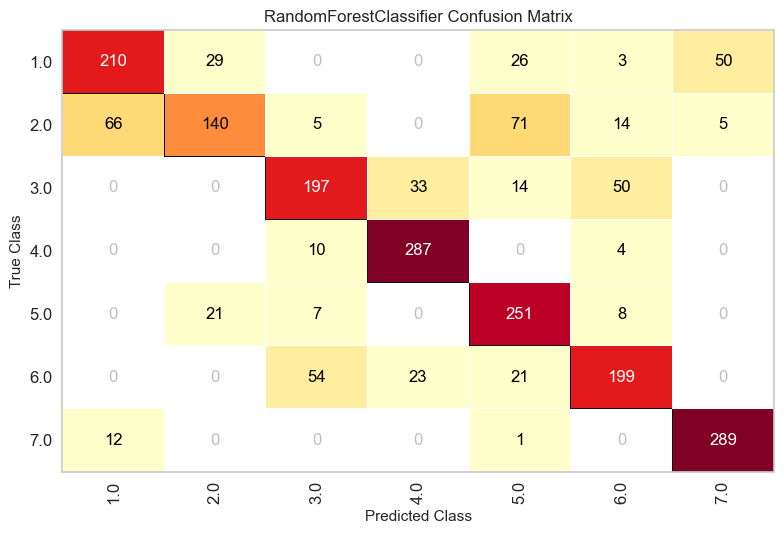

In [66]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rf_tuned_scaled)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)

cm.show()

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.73      0.66      0.69       318
         2.0       0.74      0.47      0.57       301
         3.0       0.72      0.67      0.69       294
         4.0       0.84      0.95      0.89       301
         5.0       0.65      0.87      0.75       287
         6.0       0.72      0.67      0.69       297
         7.0       0.84      0.96      0.89       302

    accuracy                           0.75      2100
   macro avg       0.75      0.75      0.74      2100
weighted avg       0.75      0.75      0.74      2100



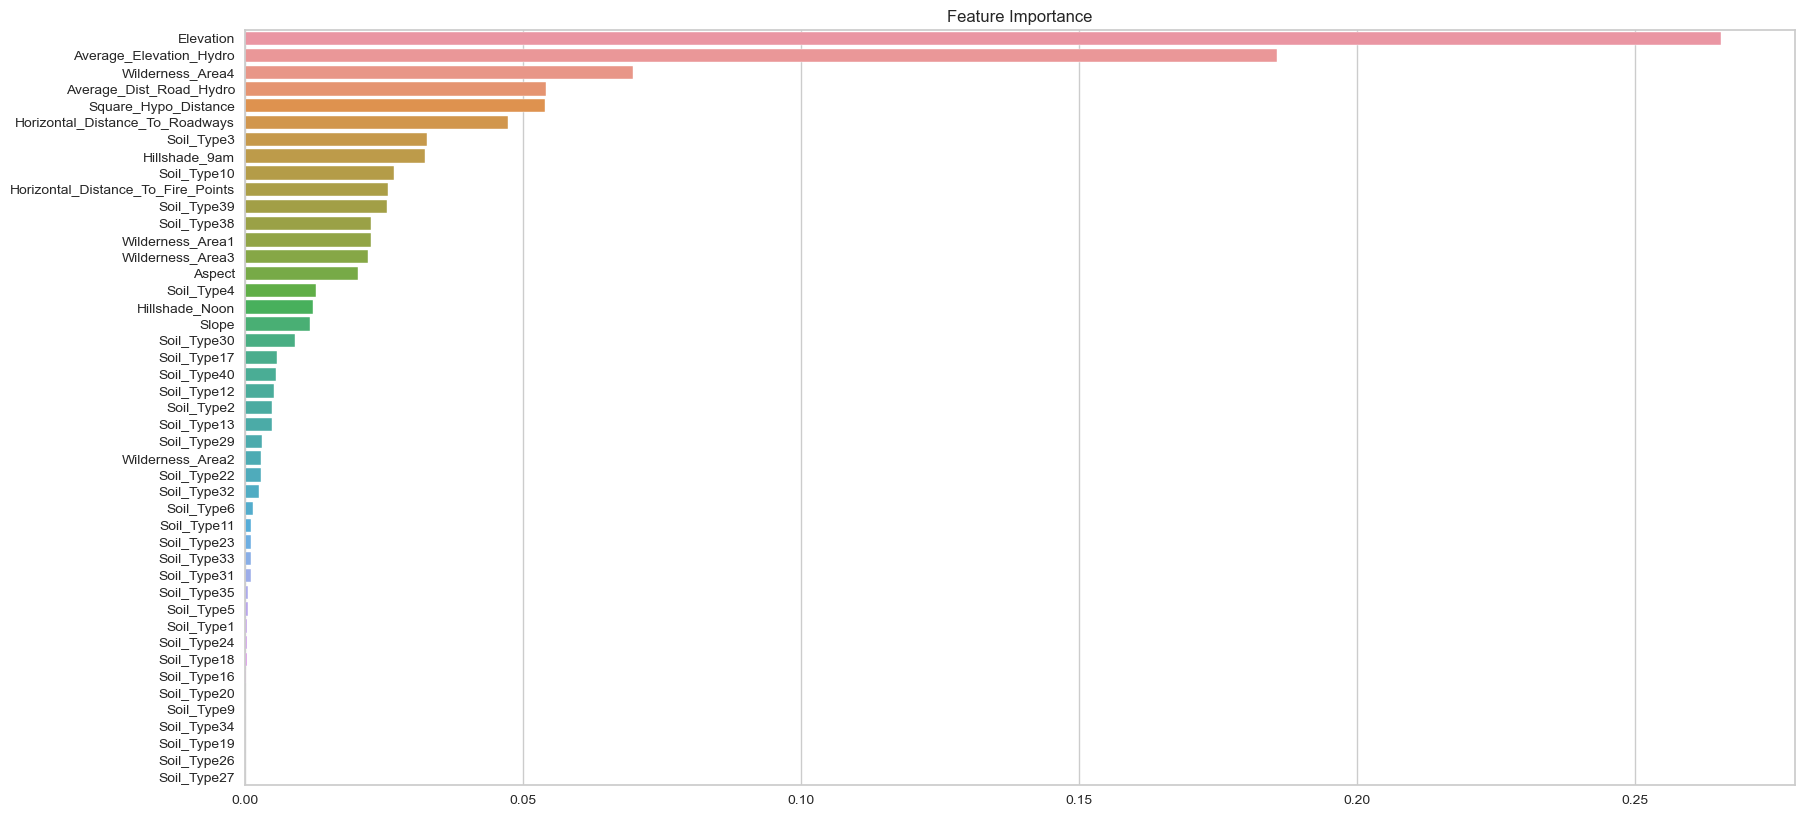

In [68]:
plt.figure(figsize=(20,10))
feature_imp = pd.Series(rf_tuned_scaled.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

## Decision Tree

In [69]:
modelTree = DecisionTreeClassifier()

In [70]:
modelTree.fit(X_train , y_train)

DecisionTreeClassifier()

In [71]:
y_pred = modelTree.predict(X_test)

In [72]:
tree_f1 = f1_score(y_test, y_pred, average='macro')
tree_f1

0.7732698978298354

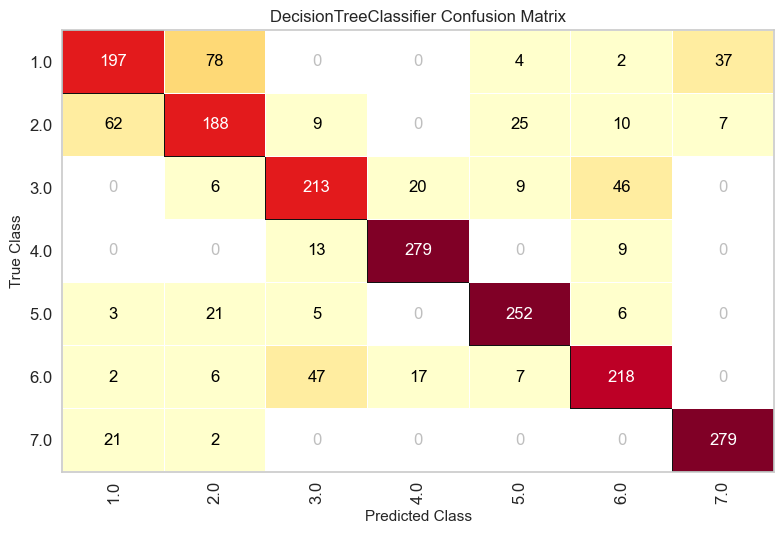

In [73]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(modelTree)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.69      0.62      0.65       318
         2.0       0.62      0.62      0.62       301
         3.0       0.74      0.72      0.73       294
         4.0       0.88      0.93      0.90       301
         5.0       0.85      0.88      0.86       287
         6.0       0.75      0.73      0.74       297
         7.0       0.86      0.92      0.89       302

    accuracy                           0.77      2100
   macro avg       0.77      0.78      0.77      2100
weighted avg       0.77      0.77      0.77      2100



Text(0.5, 1.0, 'F1 Score of Different Models')

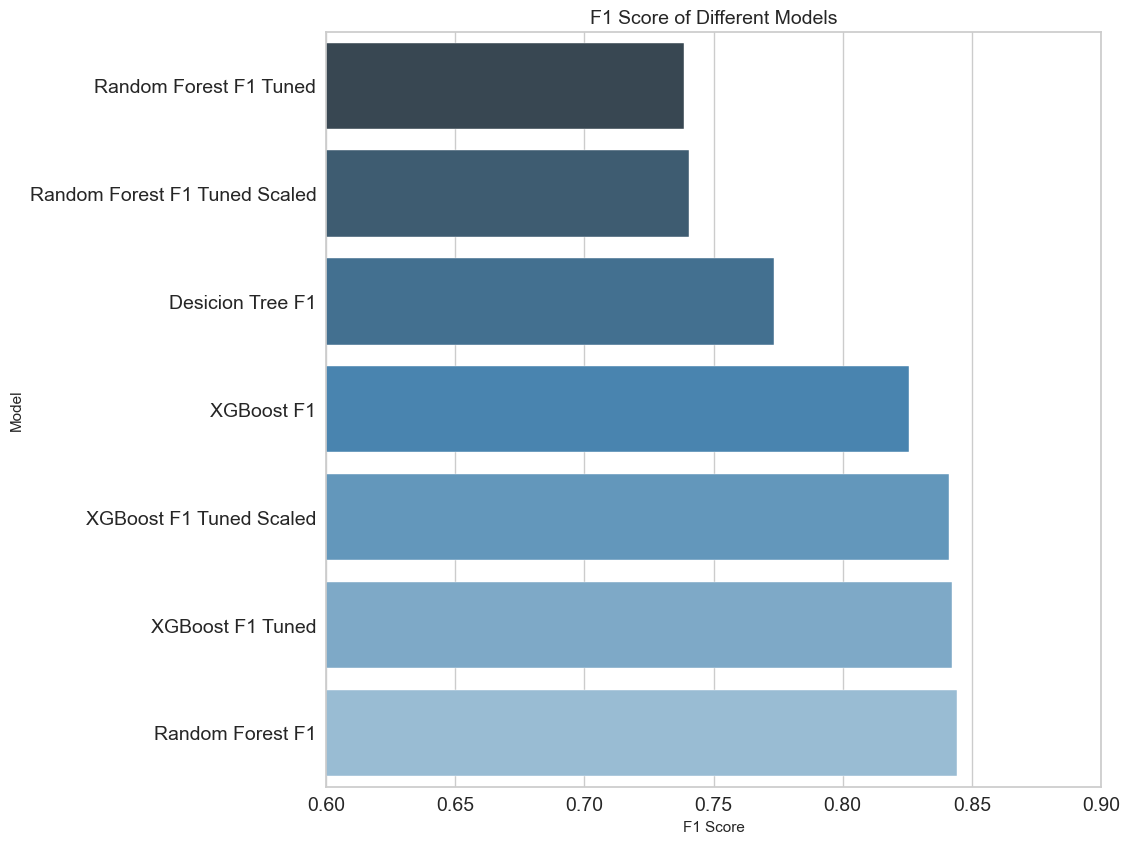

In [76]:
compare = pd.DataFrame({"Model": ["XGBoost F1", "XGBoost F1 Tuned", "XGBoost F1 Tuned Scaled", "Random Forest F1",
                                  "Random Forest F1 Tuned","Random Forest F1 Tuned Scaled","Desicion Tree F1"],
                        "F1 Score": [xgb_f1, xgb_f1_tuned, xgb_f1_tuned_scaled, rf_f1, rf_f1_tuned, rf_f1_tuned_scaled,tree_f1]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
ax.set_xlim(.60, .90)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score of Different Models", size=14)